In [2]:
import sunpy.data.sample
import sunpy.map

/anaconda2/lib/python2.7/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


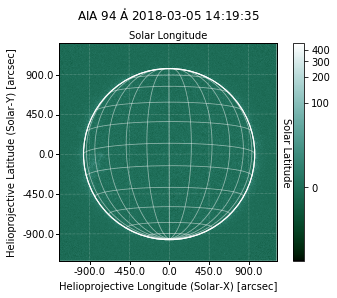

In [6]:
import matplotlib.pyplot as plt

aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

ax = plt.subplot(111, projection=aia)

aia.plot()
aia.draw_limb()
aia.draw_grid()
aia.draw_limb()
plt.colorbar()

plt.show()

/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


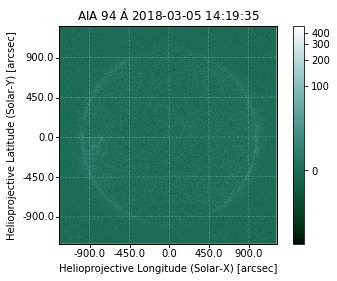

In [7]:
aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
aia.peek()

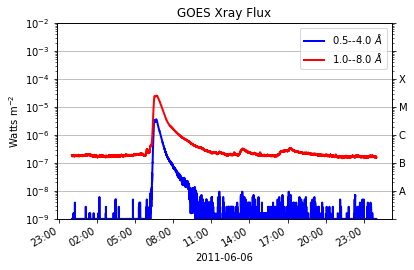

In [8]:
import numpy as np
import sunpy.timeseries as ts

my_timeseries = ts.TimeSeries(sunpy.data.sample.GOES_XRS_TIMESERIES, source='XRS')
my_timeseries.peek()

/anaconda2/lib/python2.7/site-packages/sunpy/spectra/__init__.py:8: SunpyDeprecationWarning: As of v0.8.0, the `sunpy.spectra` module is deprecated and will be removed in a future version. This module is being moved to radiospectra - http://docs.sunpy.org/projects/radiospectra/
  warnings.warn( deprecation_message, SunpyDeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sunpy/spectra/sources/callisto.py:287: SunpyDeprecationWarning: this module is being moved to radiospectra - http://docs.sunpy.org/projects/radiospectra/
  content, instruments
/anaconda2/lib/python2.7/site-packages/sunpy/spectra/spectrogram.py:913: SunpyDeprecationWarning: this module is being moved to radiospectra - http://docs.sunpy.org/projects/radiospectra/
  content, instruments


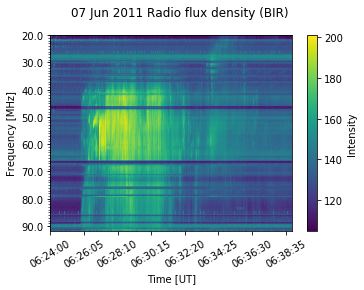

In [9]:
import sunpy.data.sample
from sunpy.spectra.sources.callisto import CallistoSpectrogram

image = CallistoSpectrogram.read(sunpy.data.sample.CALLISTO_SPECTRUM)
image.peek()

In [10]:
from sunpy.net import Fido, attrs as a
import astropy.units as u

In [11]:
search = Fido.search(a.Time('2018/03/04T03:10:00', '2018/03/04T03:13:00'), a.Instrument('SOT'))

In [12]:
print(search)

Results from 1 Provider:

5 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...     Type     Wavelength [2] 
                                               ...                 Angstrom    
       str19               str19         str6  ...    str11        float64     
------------------- ------------------- ------ ... ----------- ----------------
2018-03-04 03:12:42 2018-03-04 03:12:43 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-03-04 03:12:46 2018-03-04 03:12:47 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-03-04 03:12:50 2018-03-04 03:12:51 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-03-04 03:12:53 2018-03-04 03:12:54 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-03-04 03:12:57 2018-03-04 03:12:58 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2




In [4]:
Fido.fetch(search)

[                                        ========================================


['/Users/padman/sunpy/data/sp4d20180304_031242_0.fits',
 '/Users/padman/sunpy/data/sp4d20180304_031246_2.fits',
 '/Users/padman/sunpy/data/sp4d20180304_031250_0.fits',
 '/Users/padman/sunpy/data/sp4d20180304_031253_7.fits',
 '/Users/padman/sunpy/data/sp4d20180304_031257_5.fits']

In [13]:
import itertools
import threading
import time
import sys

done = False
#here is the animation
def animate():
    for c in itertools.cycle(['|', '/', '-', '\\']):
        if done:
            break
        sys.stdout.write('\rloading ' + c)
        sys.stdout.flush()
        time.sleep(0.1)
    sys.stdout.write('\rDone!      ')

t = threading.Thread(target=animate)
t.start()

#long process here
time.sleep(3)
done = True

Done!      

In [16]:
%run /Users/padman/Desktop/lmsal/data\ importer/run.py


Available instruments: ['aia', 'hmi', 'iris', 'sot']
Enter observation instrument: (e.g. hmi)
==> iris
Working...

Enter start date: (must be in format yyyy/mm/dd)
==> 2016/04/05
Working...

Enter start time: (must be in format hh:mm:ss)
==> 13:40:00
Working...

Enter end date: (must be in format yyyy/mm/dd)
==> 2016/04/05
Working...

Enter end time: (must be in format hh:mm:ss)
==> 14:40:00
Working...

Available wavelengths (in angstroms) for iris instrument:
['1400', '2796', '2832', '1330']
Enter desired wavelength: (an invalid wavelength will not return search results)
==> 1330
Working...

Data search complete. Displaying...

Results from 1 Provider:

0 Results from the VSOClient:
Start Time End Time  Source Instrument   Type 
 float64   float64  float64  float64   float64
---------- -------- ------- ---------- -------


Results from 1 Provider:

0 Results from the VSOClient:
Start Time End Time  Source Instrument   Type 
 float64   float64  float64  float64   float64
---------- --

In [17]:
from sunpy.net.helioviewer import HelioviewerClient

In [18]:
hv = HelioviewerClient()

In [19]:
datasources = hv.get_data_sources()

In [20]:
for observatory, instruments in datasources.items():  
    for inst, detectors in instruments.items():  
        for det, measurements in detectors.items():  
            for meas, params in measurements.items():  
                print("%s %s: %d" % (observatory, params['nickname'], params['sourceId']))

Yohkoh SXT AlMgMn: 33
Yohkoh SXT thin-Al: 34
Yohkoh SXT white-light: 35
PROBA2 SWAP 174: 32
STEREO_A EUVI-A 195: 21
STEREO_A EUVI-A 304: 23
STEREO_A EUVI-A 284: 22
STEREO_A EUVI-A 171: 20
STEREO_A COR2-A: 29
STEREO_A COR1-A: 28
STEREO_B EUVI-B 195: 25
STEREO_B EUVI-B 304: 27
STEREO_B EUVI-B 284: 26
STEREO_B EUVI-B 171: 24
STEREO_B COR2-B: 31
STEREO_B COR1-B: 30
SOHO MDI Mag: 6
SOHO MDI Int: 7
SOHO EIT 195: 1
SOHO EIT 304: 3
SOHO EIT 284: 2
SOHO EIT 171: 0
SOHO LASCO C3: 5
SOHO LASCO C2: 4
SDO AIA 1700: 16
SDO AIA 211: 12
SDO AIA 335: 14
SDO AIA 1600: 15
SDO AIA 304: 13
SDO AIA 193: 11
SDO AIA 131: 9
SDO AIA 4500: 17
SDO AIA 94: 8
SDO AIA 171: 10
SDO HMI Mag: 19
SDO HMI Int: 18


In [21]:
import matplotlib.pyplot as plt

In [22]:
from matplotlib.image import imread

In [23]:
file = hv.download_png("2099/01/01", 4.8, "[0,1,100]", x0=0, y0=0, width=256, height=256)

In [24]:
im = imread(file)

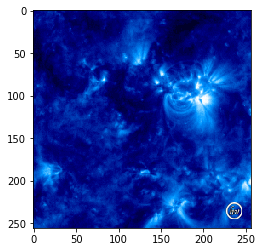

In [25]:
plt.imshow(im)

In [37]:
%run /Users/padman/Desktop/lmsal/movie\ gen/downloader.py